In [2]:
import os
os.chdir('../')

In [38]:
from core.general_dataset.base import GeneralizedDataset
from core.utils import yaml_read

def make_cfg(config, split):
    cfg = config.copy()
    cfg['split'] = split
    # disable sampling and augmentations for val/test
    if split in ('valid', 'test'):
        cfg['validate_road_ratio'] = False
        cfg['max_attempts'] = 1
        cfg['augmentations'] = []  # no augmentations
    return cfg

yaml_path = 'configs/dataset/AL175.yaml'
config = yaml_read(yaml_path)
dataset = GeneralizedDataset(make_cfg(config, 'train'))
print("Dataset length:", len(dataset))

→ Split 'train': 4 stems
     image   : 4 files
     label   : 4 files
     distance: 4 files

→ Split 'test': 1 stems
     label   : 1 files
     image   : 1 files
     distance: 1 files

→ Split 'valid': 1 stems
     image   : 1 files
     label   : 1 files
     distance: 1 files



Processing distance maps:   0%|          | 0/4 [00:00<?, ?it/s]

Processing distance maps: 100%|██████████| 4/4 [00:00<00:00, 221.28it/s]

Dataset length: 4


Images: torch.Size([4, 1, 200, 200, 200]), Label: torch.Size([4, 1, 200, 200, 200])
torch.Size([1, 200, 200, 200]) torch.Size([1, 200, 200, 200])


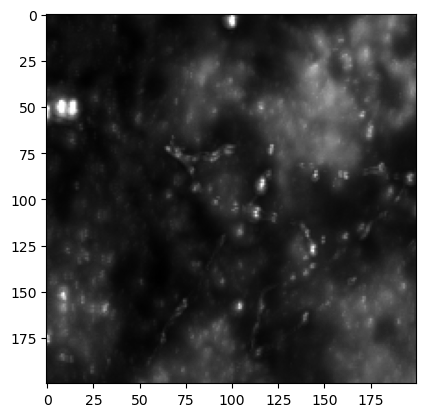

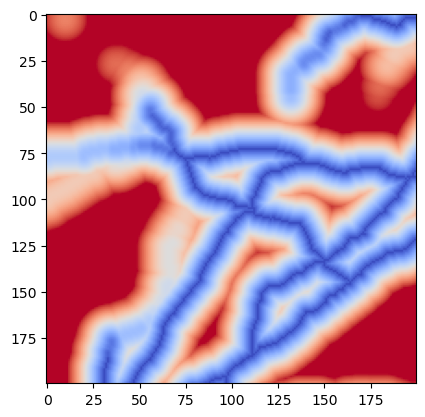

torch.Size([1, 200, 200, 200]) torch.Size([1, 200, 200, 200])


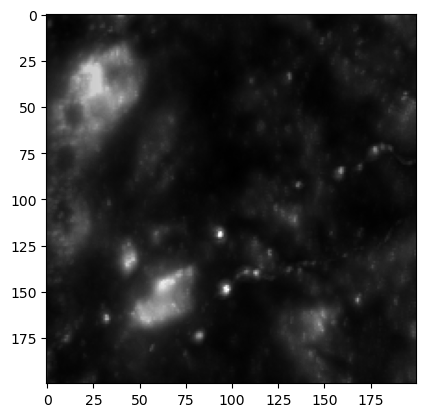

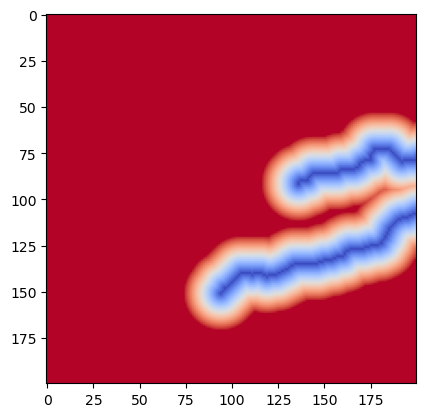

torch.Size([1, 200, 200, 200]) torch.Size([1, 200, 200, 200])


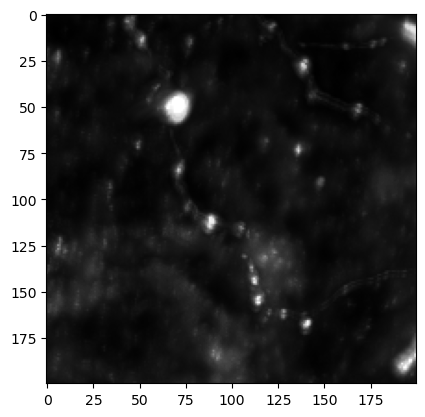

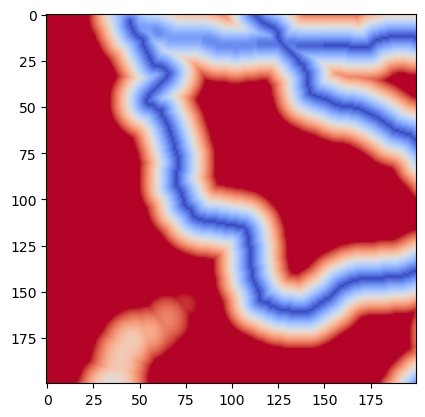

torch.Size([1, 200, 200, 200]) torch.Size([1, 200, 200, 200])


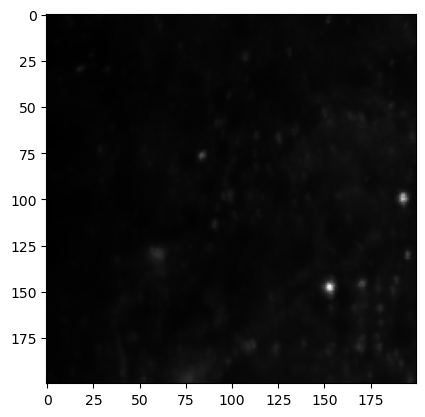

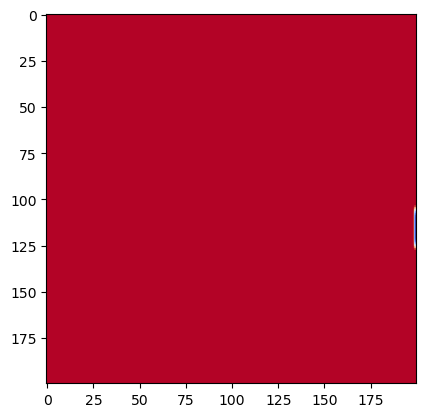

In [ ]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np  

import matplotlib.pyplot as plt
import numpy as np

def plot_batch_with_stats(batch, slice_dim=2):
    """
    Plot image, distance label, and binary label projections side by side,
    plus a bar chart of their min, max, and mean statistics for each sample.
    
    Args:
        batch: dict with keys "image_patch", "distance_patch", "label_patch"
        slice_dim: axis along which to take the max/min projection (default: 2 for Z)
    """
    images = batch["image_patch"]
    distlbls = batch["distance_patch"]
    lbls = batch["label_patch"]

    for img, distlbl, lbl in zip(images, distlbls, lbls):
        # Projections
        img_proj  = img[0].numpy().max(slice_dim)
        dist_proj = distlbl[0].numpy().min(slice_dim)
        lbl_proj  = lbl[0].numpy().max(slice_dim)

        # Plot side by side images
        fig, axes = plt.subplots(1, 4, figsize=(16, 4))
        for ax, proj, title in zip(
            axes[:3],
            (img_proj, dist_proj, lbl_proj),
            ("Image Projection", "Distance Map", "Label Projection"),
        ):
            ax.imshow(proj, cmap='gray')
            ax.set_title(title)
            ax.axis("off")
        
        # Compute stats
        stats = {
            'Image': (img_proj.min(), img_proj.max(), img_proj.mean()),
            'Distance': (dist_proj.min(), dist_proj.max(), dist_proj.mean()),
            'Label': (lbl_proj.min(), lbl_proj.max(), lbl_proj.mean()),
        }
        print(stats)
        # Bar chart of stats
        categories = list(stats.keys())
        mins = [stats[k][0] for k in categories]
        maxs = [stats[k][1] for k in categories]
        means = [stats[k][2] for k in categories]
        
        x = np.arange(len(categories))
        width = 0.2
        
        ax_stats = axes[3]
        ax_stats.bar(x - width, mins,    width, label='Min')
        ax_stats.bar(x,         means,  width, label='Mean')
        ax_stats.bar(x + width, maxs,    width, label='Max')
        ax_stats.set_xticks(x)
        ax_stats.set_xticklabels(categories)
        ax_stats.set_title('Min/Mean/Max per Projection')
        ax_stats.legend()
        ax_stats.grid(True, linestyle='--', alpha=0.5)
        
        plt.tight_layout()
        plt.show()

# Usage:
# batch = next(iter(loader))
# plot_batch_with_stats(batch)


def plot_3d_volume(volume, threshold, greater_is_road=False):
    plt.ion()
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    if greater_is_road:
        x, y, z = np.where(volume > threshold)
    else:
        x, y, z = np.where(volume <= threshold)
    ax.scatter(x, y, z, c=volume[x, y, z], cmap='viridis', marker='o', alpha=0.5)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    plt.show()


loader = DataLoader(dataset, batch_size=8, shuffle=True, num_workers=4, pin_memory=True)

batch = next(iter(loader))

print(f'Images: {batch["image_patch"].shape}, Label: {batch["label_patch"].shape}')

# for img, distlbl, lbl in zip(batch["image_patch"], batch["distance_patch"], batch["label_patch"]):
#     print(img.shape, lbl.shape)
#     # plot_3d_volume(img[0].numpy(), threshold=0, greater_is_road=False)
#     # plot_3d_volume(lbl[0].numpy(), threshold=0, greater_is_road=True)
#     plt.imshow(img[0].numpy().max(2))
#     plt.show()
#     plt.imshow(distlbl[0].numpy().min(2))#, cmap='coolwarm')
#     plt.show()
#     plt.imshow(lbl[0].numpy().max(2))
#     plt.show()
# batch = next(iter(loader))
plot_batch_with_stats(batch)



In [50]:
pred = np.load('AllFayzad/val_e999_b13_i0_pred.npy')
gt = np.load('AllFayzad/val_e9_b13_i0_gt.npy')

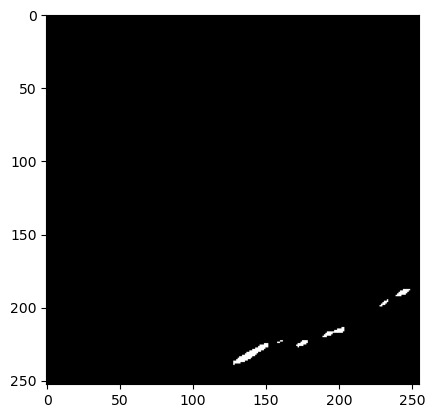

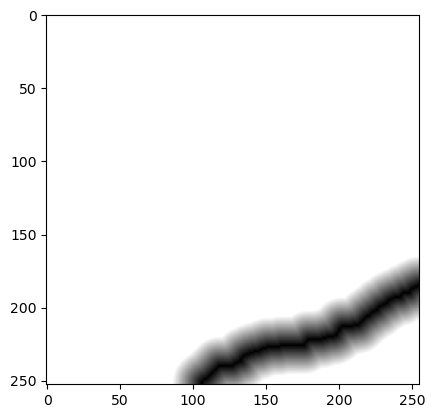

In [52]:
plt.imshow(pred[0].min(2)<2, cmap='gray')
plt.show()
plt.imshow(gt[0].min(2), cmap='gray')
plt.show()